### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path


### Read CSV as Pandas DataFrame

In [2]:
# Read in csv
csv_path = Path("../Resources/tsla_google_finance.csv")
tsla_df = pd.read_csv(csv_path)
tsla_df.head()

,Date,Close
0,11/13/18,338.73
1,11/14/18,344.00
2,11/15/18,348.44
3,11/16/18,354.31
4,11/19/18,353.47


### Index Data by `Date`

In [5]:
# Set `Date` as index
tsla_df.set_index("Date", inplace=True)

In [6]:
tsla_df

,Close
Date,
11/13/18,338.73
11/14/18,344.00
11/15/18,348.44
11/16/18,354.31
11/19/18,353.47
...,...
5/8/19,244.84
5/9/19,241.98
5/10/19,239.52


### Assess and Clean Data

In [7]:
# Check for nulls
print(tsla_df.isnull().sum())

# Drop missing values
tsla_df.dropna()


# Validate no more missing values
print(tsla_df.isnull().sum())

Close    0
dtype: int64
Close    0
dtype: int64


### Calculate Daily Returns

In [8]:
# Calculate daily returns
returns = tsla_df.pct_change().dropna()
returns

,Close
Date,
11/14/18,0.015558
11/15/18,0.012907
11/16/18,0.016847
11/19/18,-0.002371
11/20/18,-0.016918
...,...
5/8/19,-0.008986
5/9/19,-0.011681
5/10/19,-0.010166


### Sort the DataFrame by `Close` to Get Records with Top Daily Returns

In [10]:
# Sort data by `Close` in descending order
returns.sort_values("Close", ascending=False)

,Close
Date,
12/26/18,0.103930
11/26/18,0.061903
1/4/19,0.057697
2/27/19,0.056671
12/28/18,0.056116
...,...
1/2/19,-0.068149
12/24/18,-0.076242
3/1/19,-0.078436


### Slice Out 5 Records

In [18]:
# Slice out top 5
top_five = returns.sort_values("Close", ascending=False).head(5)
top_five

,Close
Date,
12/26/18,0.103930
11/26/18,0.061903
1/4/19,0.057697
2/27/19,0.056671
12/28/18,0.056116


### Plot Top 5 Performing Days for TSLA Daily Returns

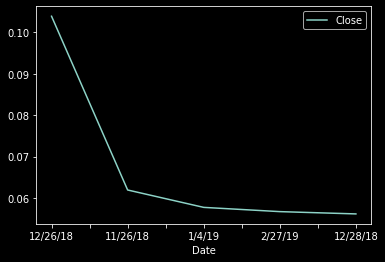

In [19]:
# Plot top 5 performing days
top_five.plot()

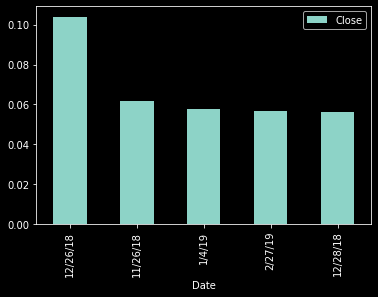

In [20]:
# Alternatively, visualizing the returns as a bar chart:
top_five.plot(kind="bar")